# Analysis of uncertainty propagation with Monte Carlo sampling



In [14]:
from IPython.core.display import HTML
css_file = 'pynoddy.css'
HTML(open(css_file, "r").read())
%matplotlib inline

In [8]:
# here the usual imports. If any of the imports fails, make sure that pynoddy is installed
# properly, ideally with 'python setup.py develop' or 'python setup.py install'
import sys, os
import matplotlib.pyplot as plt
import numpy as np

# adjust some settings for matplotlib
from matplotlib import rcParams
# print rcParams
rcParams['font.size'] = 15

# determine path of repository to set paths corretly below
repo_path = os.path.realpath('../..')
import pynoddy.history
import pynoddy.experiment
rcParams.update({'font.size': 20})

print "Success!"

Success!


## Using the Monte-Carlo experiment class
 
The methods for repeated Monte-Carlo sampling are integrated in a Python experiment class. As before, we can therefore load the model and a parameter file which defines the parameter statistics for the sampling step:

In [10]:
reload(pynoddy.history)
reload(pynoddy.output)
reload(pynoddy.experiment)
reload(pynoddy)

import pynoddy.experiment.monte_carlo
reload(pynoddy.experiment.monte_carlo)

from pynoddy.experiment.monte_carlo import MonteCarlo

# the model itself is now part of the repository, in the examples directory:
history_file = os.path.join(repo_path, "examples/fold_dyke_fault.his")

#this file defines the statistical distributions to sample from
params = os.path.join(repo_path, "examples/fold_dyke_fault.csv")

#now we initialise a MonteCarlo experiment
gipps_mc = MonteCarlo(history_file,params)


We now generate a specified amount of samples (8 in this example) and run them through Noddy. Note that Noddy can be spawned in separate threads: this example runs models in 4 different threads, reducing runtime substantially (though naturally things still take a while, especially when running more complex models).

It is also worth noting that we specify a random seed of 10 at this point, so that an identical set of models is generated each time anyone runs this notebook (ie. experiments are reproducible).

In [11]:
n_draws = 8 #the number of models to produce
output_path = os.path.join(repo_path,'sandbox/out') #the location to write models too

gipps_mc.change_cube_size(100) #change block size
gipps_mc.generate_model_instances(output_path,n_draws,threads=4, verbose=False, seed=10)

print "%d random model variations produced." % n_draws

8 random model variations produced.


Now that the model instances have been generated, we need to load them into memory (from the output directory we specified earlier). The easiest way to do this is to use a static method in the MonteCarlo class: load_noddy_realisations.

MonteCarlo.load_noddy_realisations simply looks in the directory provided and loads all of the noddy models it can find. It returns these models as a list of NoddyOutput objects, which can be used for any further processing.

In [15]:
models = MonteCarlo.load_noddy_realisations(output_path,verbose=False)
print "%d models loaded" % len(models)

8 models loaded


Now, lets draw some of them

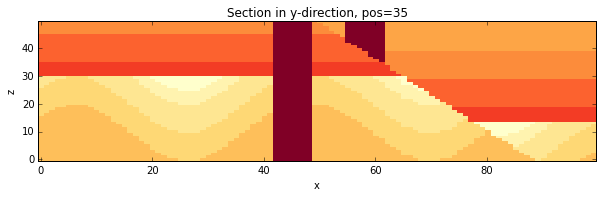

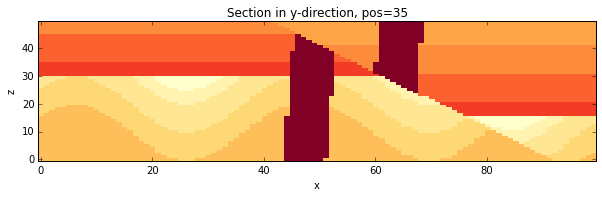

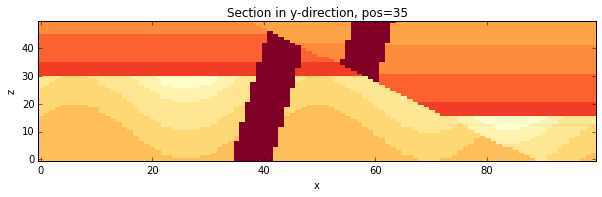

In [16]:
for i in range(3):
    models[i].plot_section(direction = 'y', ve=.5)

Finally, we should really (but don't need to) delete all of the files we've generated.

In [17]:
gipps_mc.cleanup()
print "Finito!"

Finito!


And now we're all done. While the MonteCarlo class itself does not perform any particularly exciting analyses, it provides an easy (and fast) way of producing suites of randomly purturbed models. 

See the Topology Analysis and Uncertainty Analysis notebooks for examples of the types of analyses that the MonteCarlo class allows.